# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


#### 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Validation:   
- Describe validation and cleaning steps for every column in the data 

In [3]:
# Load the data
df = pd.read_csv('recipe_site_traffic_2212.csv')

# Inspect the data
print(df.head())

# Handling missing values
df.fillna(value=np.nan, inplace=True)

# Convert 'servings' to numeric data type
df['servings'] = pd.to_numeric(df['servings'], errors='coerce')

# Handle 'high_traffic' column (assuming NA means not high traffic)
df['high_traffic'].fillna('Not High', inplace=True)

# Inspect the cleaned data
print(df.head())

# Save the cleaned data
df.to_csv('cleaned_recipe_site_traffic.csv', index=False)


   recipe  calories  carbohydrate  sugar  protein   category servings  \
0       1       NaN           NaN    NaN      NaN       Pork        6   
1       2     35.48         38.56   0.66     0.92     Potato        4   
2       3    914.28         42.68   3.09     2.88  Breakfast        1   
3       4     97.03         30.56  38.63     0.02  Beverages        4   
4       5     27.05          1.85   0.80     0.53  Beverages        4   

  high_traffic  
0         High  
1         High  
2          NaN  
3         High  
4          NaN  
   recipe  calories  carbohydrate  sugar  protein   category  servings  \
0       1       NaN           NaN    NaN      NaN       Pork       6.0   
1       2     35.48         38.56   0.66     0.92     Potato       4.0   
2       3    914.28         42.68   3.09     2.88  Breakfast       1.0   
3       4     97.03         30.56  38.63     0.02  Beverages       4.0   
4       5     27.05          1.85   0.80     0.53  Beverages       4.0   

  high_traffic

C:\Users\HP\AppData\Local\Temp\ipykernel_23080\3295840211.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['high_traffic'].fillna('Not High', inplace=True)


In [13]:
# Function to clean outliers using Z-score
def clean_outliers_zscore(df, columns):
    threshold = 3
    cleaned_df = df.copy()
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers = z_scores > threshold
        cleaned_df.loc[outliers, col] = np.nan
    return cleaned_df

# Function to clean outliers using IQR (Interquartile Range)
def clean_outliers_iqr(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        cleaned_df.loc[outliers, col] = np.nan
    return cleaned_df

# Specify columns to clean outliers from
columns_to_clean = ['calories', 'carbohydrate', 'sugar', 'protein']  

# Clean outliers using Z-score method
cleaned_df_zscore = clean_outliers_zscore(df, columns_to_clean)

# Clean outliers using IQR method
cleaned_df_iqr = clean_outliers_iqr(df, columns_to_clean)

# Inspect the cleaned dataframes
print(cleaned_df_zscore.head())
print(cleaned_df_iqr.head())

# Save the cleaned dataframes
cleaned_df_zscore.to_csv('cleaned_recipe_site_traffic_zscore.csv', index=False)
cleaned_df_iqr.to_csv('cleaned_recipe_site_traffic_iqr.csv', index=False)

   recipe  calories  carbohydrate  sugar  protein   category  servings  \
0       1       NaN           NaN    NaN      NaN       Pork       6.0   
1       2     35.48         38.56   0.66     0.92     Potato       4.0   
2       3    914.28         42.68   3.09     2.88  Breakfast       1.0   
3       4     97.03         30.56  38.63     0.02  Beverages       4.0   
4       5     27.05          1.85   0.80     0.53  Beverages       4.0   

  high_traffic  popularity  
0         High           1  
1         High           1  
2     Not High           0  
3         High           1  
4     Not High           0  
   recipe  calories  carbohydrate  sugar  protein   category  servings  \
0       1       NaN           NaN    NaN      NaN       Pork       6.0   
1       2     35.48         38.56   0.66     0.92     Potato       4.0   
2       3    914.28         42.68   3.09     2.88  Breakfast       1.0   
3       4     97.03         30.56    NaN     0.02  Beverages       4.0   
4       5  

### Exploratory Analysis:  
- Include two different graphics showing single variables only to demonstrate the characteristics of data  
- Include at least one graphic showing two or more variables to represent the relationship between features
- Describe your findings

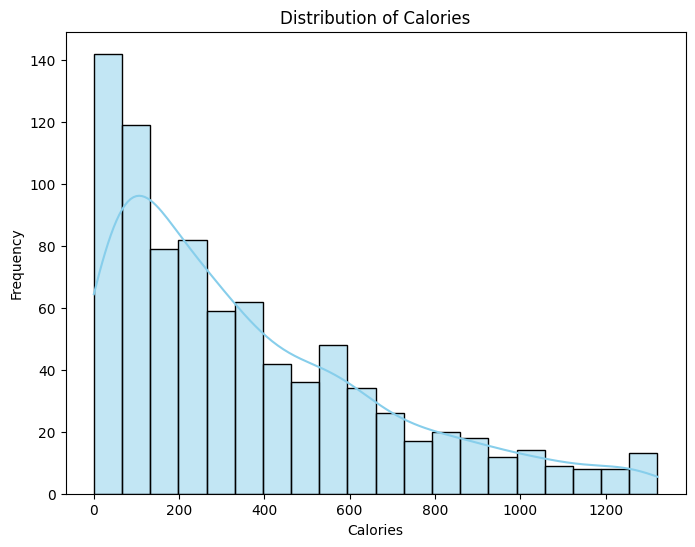

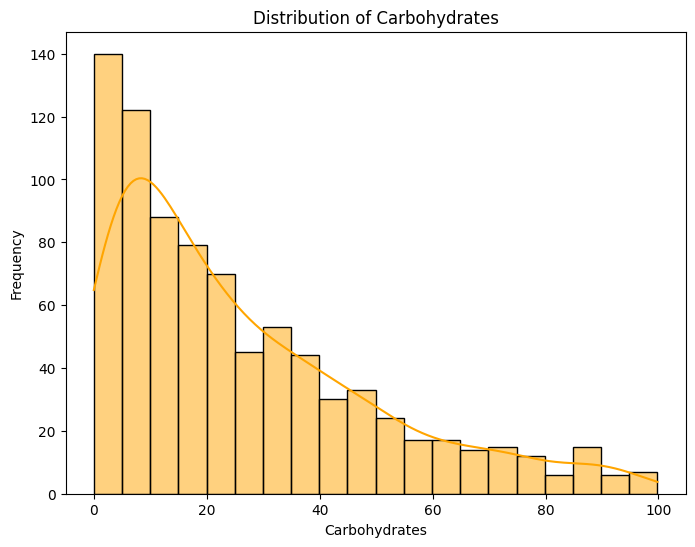

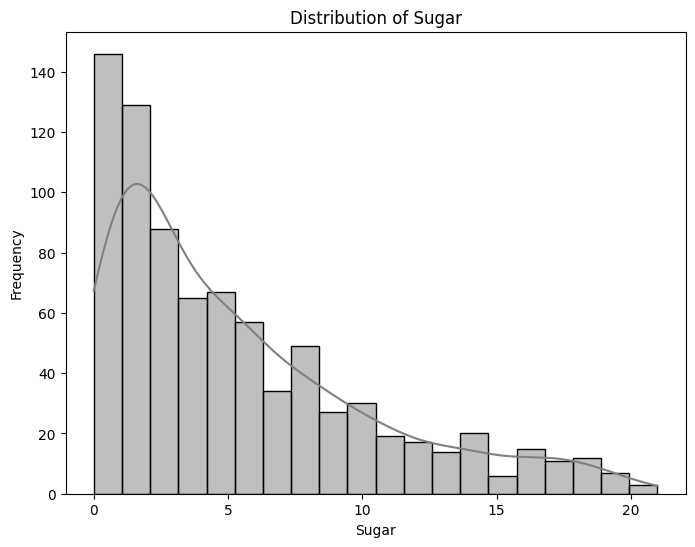

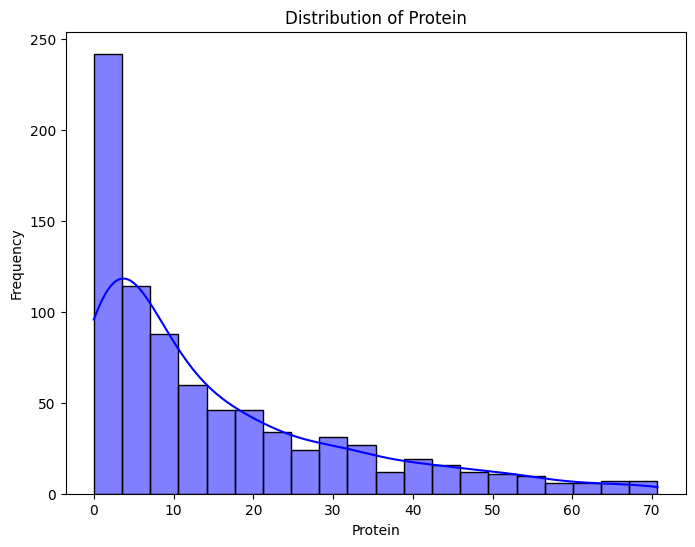

C:\Users\HP\AppData\Local\Temp\ipykernel_23080\1203587575.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_df_iqr, x='category', palette='pastel')


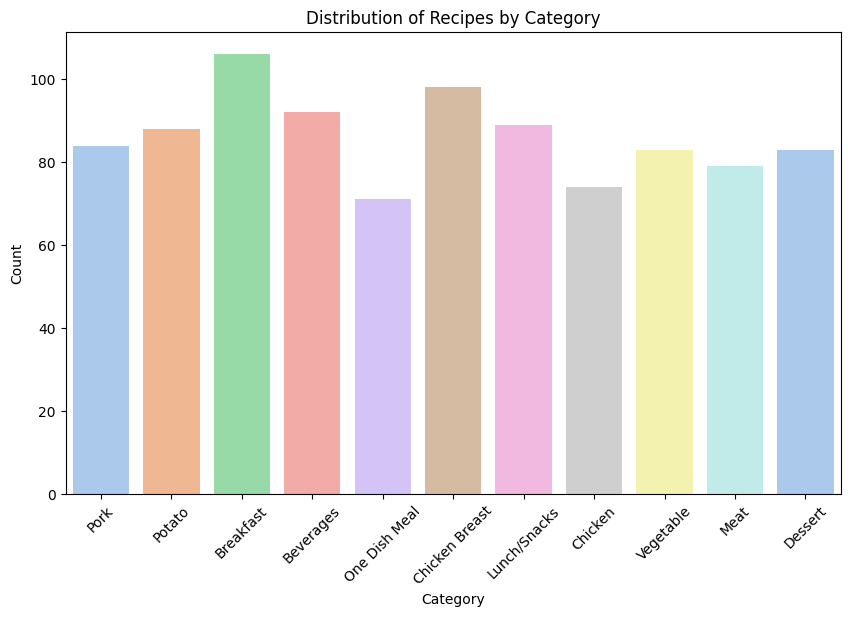

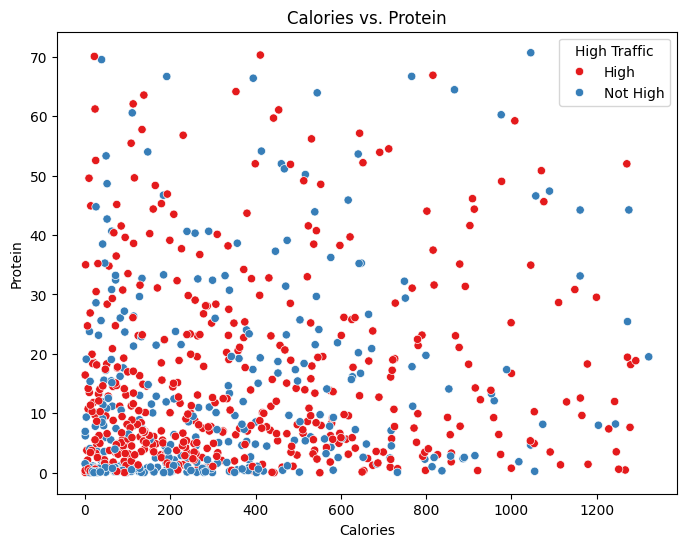

C:\Users\HP\AppData\Local\Temp\ipykernel_23080\1203587575.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_df_iqr, x='category', y='calories', palette='pastel')


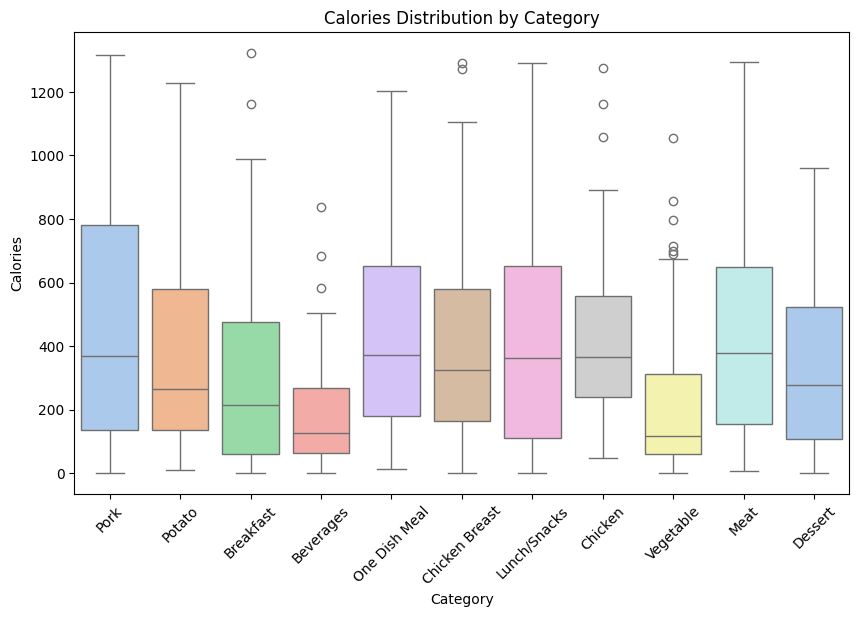

In [15]:
# Single Variable Analysis
# Histogram of calories
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_df_iqr['calories'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

# Histogram of carbohydrates
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_df_iqr['carbohydrate'], bins=20, kde=True, color='orange')
plt.title('Distribution of Carbohydrates')
plt.xlabel('Carbohydrates')
plt.ylabel('Frequency')
plt.show()

# Histogram of sugar
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_df_iqr['sugar'], bins=20, kde=True, color='grey')
plt.title('Distribution of Sugar')
plt.xlabel('Sugar')
plt.ylabel('Frequency')
plt.show()

# Histogram of protein
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_df_iqr['protein'], bins=20, kde=True, color='blue')
plt.title('Distribution of Protein')
plt.xlabel('Protein')
plt.ylabel('Frequency')
plt.show()

# Bar plot of category
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_df_iqr, x='category', palette='pastel')
plt.title('Distribution of Recipes by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Relationship Between Features
# Scatter plot of calories vs. protein
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_df_iqr, x='calories', y='protein', hue='high_traffic', palette='Set1')
plt.title('Calories vs. Protein')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.legend(title='High Traffic', loc='upper right')
plt.show()

# Box plot of calories by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_df_iqr, x='category', y='calories', palette='pastel')
plt.title('Calories Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.show()

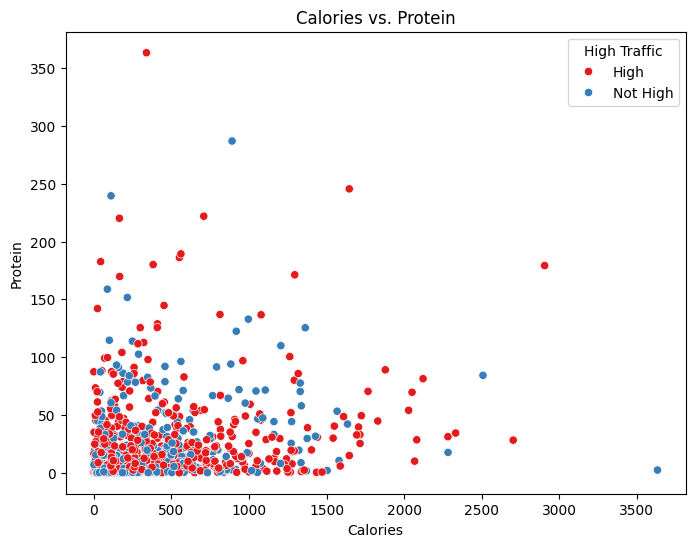

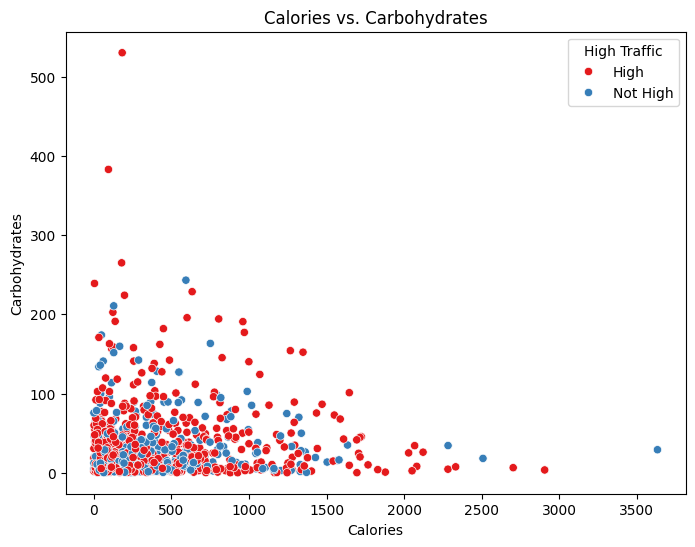

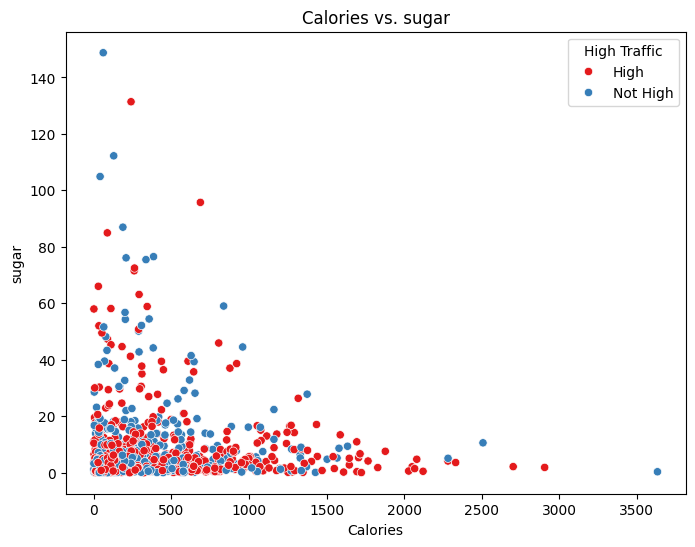

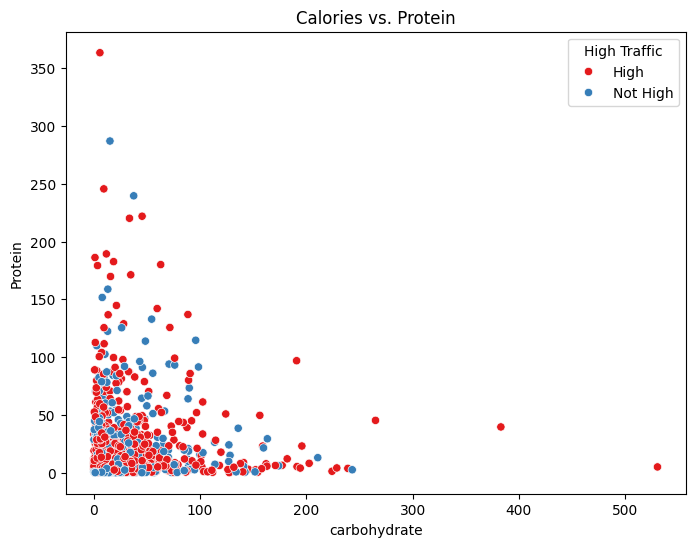

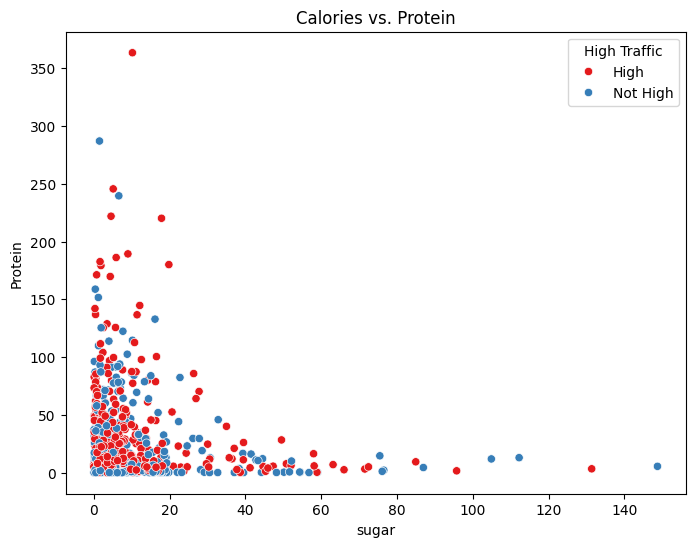

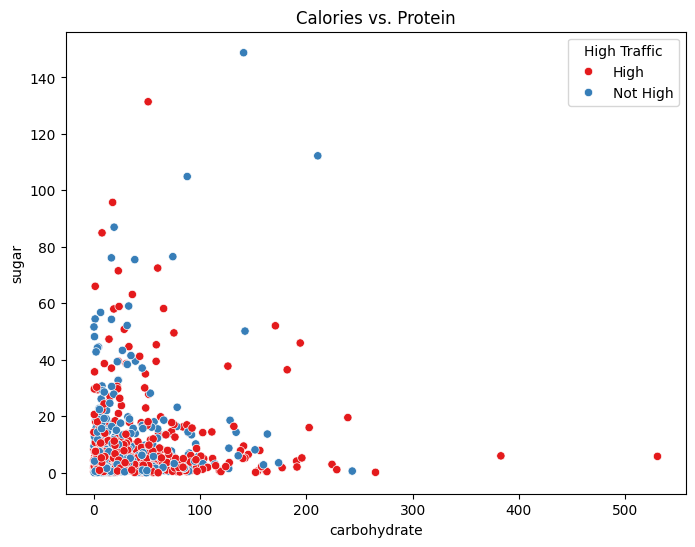

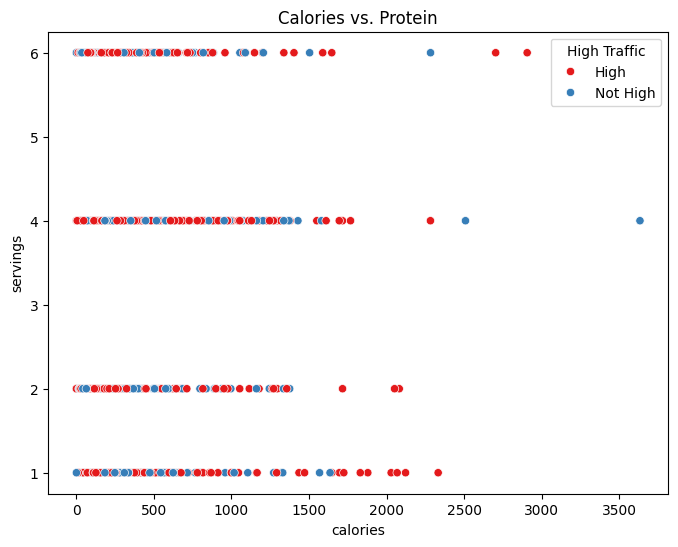

In [23]:
# Relationship Between Features
# Scatter plot of calories vs. protein
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='calories', y='protein', hue='high_traffic', palette='Set1')
plt.title('Calories vs. Protein')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.legend(title='High Traffic', loc='upper right')
plt.show()

# Scatter plot of calories vs. carbohydrates
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='calories', y='carbohydrate', hue='high_traffic', palette='Set1')
plt.title('Calories vs. Carbohydrates')
plt.xlabel('Calories')
plt.ylabel('Carbohydrates')
plt.legend(title='High Traffic', loc='upper right')
plt.show()

# Scatter plot of calories vs. sugar
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='calories', y='sugar', hue='high_traffic', palette='Set1')
plt.title('Calories vs. sugar')
plt.xlabel('Calories')
plt.ylabel('sugar')
plt.legend(title='High Traffic', loc='upper right')
plt.show()

# Scatter plot of protein vs. carbohydrate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='carbohydrate', y='protein', hue='high_traffic', palette='Set1')
plt.title('Calories vs. Protein')
plt.xlabel('carbohydrate')
plt.ylabel('Protein')
plt.legend(title='High Traffic', loc='upper right')
plt.show()

# Scatter plot of protein vs. sugar
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sugar', y='protein', hue='high_traffic', palette='Set1')
plt.title('Calories vs. Protein')
plt.xlabel('sugar')
plt.ylabel('Protein')
plt.legend(title='High Traffic', loc='upper right')
plt.show()

# Scatter plot of sugar vs. carbohydrate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='carbohydrate', y='sugar', hue='high_traffic', palette='Set1')
plt.title('Calories vs. Protein')
plt.xlabel('carbohydrate')
plt.ylabel('sugar')
plt.legend(title='High Traffic', loc='upper right')
plt.show()

# Scatter plot of calories vs. servings
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='calories', y='servings', hue='high_traffic', palette='Set1')
plt.title('Calories vs. Protein')
plt.xlabel('calories')
plt.ylabel('servings')
plt.legend(title='High Traffic', loc='upper right')
plt.show()

#### Description of my findings
- There are more low calorie, carbohydrate, protein, sugar recipes in the dataset
- There is not clear pattern visible between the features and the target(traffic)


#### Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models

Given the objective to predict which recipes will be popular 80% of the time while minimizing the chance of showing unpopular recipes, we can frame this as a classification problem where we classify recipes as either popular or unpopular based on a certain threshold of popularity.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyClassifier

In [25]:
# Define target variable: Popular (1) if high_traffic is "High", else Unpopular (0)
df['popularity'] = df['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)

# Features and target
X = df.drop(columns=['high_traffic', 'popularity'])  # Features
y = df['popularity']  # Target

# One-hot encoding for categorical variables
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X[['category']])
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(['category']), index=X.index)
X = pd.concat([X.drop(columns=['category']), X_encoded_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Baseline Model: Majority Class Classifier
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train, y_train)

# Baseline Predictions
baseline_pred = baseline_model.predict(X_test)


# Model: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [37]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy like 'median' or 'most_frequent'

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Now, train and evaluate your classifiers using the imputed data


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize different classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_imputed, y_train)
    y_pred = clf.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}")


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.74
Support Vector Machine: Accuracy = 0.59
K-Nearest Neighbors: Accuracy = 0.61
Decision Tree: Accuracy = 0.65
Random Forest: Accuracy = 0.71


In [43]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_imputed)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)


Accuracy: 0.6736842105263158


In [44]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Define the Gaussian Process Classifier with an RBF kernel
kernel = 1.0 * RBF(1.0)
model = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Train the model
model.fit(X_train_imputed, y_train)

# Make predictions
y_pred = model.predict(X_test_imputed)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5947368421052631


#### Model Evaluation
  - Describe the performance of the two models based on an appropriate metric


In [33]:
# Evaluation Baseline Model
baseline_accuracy = accuracy_score(y_test, baseline_pred)
baseline_precision = precision_score(y_test, baseline_pred)
baseline_recall = recall_score(y_test, baseline_pred)
baseline_f1 = f1_score(y_test, baseline_pred)

print(f"Baseline Accuracy: {baseline_accuracy:.2f}")
print(f"Baseline Precision: {baseline_precision:.2f}")
print(f"Baseline Recall: {baseline_recall:.2f}")
print(f"Baseline F1-score: {baseline_f1:.2f}\n")

# Evaluation Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Baseline Accuracy: 0.59
Baseline Precision: 0.59
Baseline Recall: 1.00
Baseline F1-score: 0.75

Accuracy: 0.71
Precision: 0.72
Recall: 0.82
F1-score: 0.77


- Baseline accuracy is 59% percent. So the accuracy of 71% seems to be good. And the model is very simple so it also indicates that its quite good


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
best_model_score = best_model.score(X_test, y_test)
print("Best Model Accuracy:", best_model_score)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Model Accuracy: 0.7157894736842105


#### Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach

  By evaluating the model's performance using these business metrics, we can assess how well it aligns with the business objectives. If the model achieves high precision, recall, and F1-score while minimizing FPR and NPV, it indicates that it can effectively predict popular recipes while minimizing the chance of showing unpopular ones.

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
false_positive_rate = conf_matrix[0,1] / (conf_matrix[0,0] + conf_matrix[0,1])
positive_prediction_value = precision
negative_prediction_value = conf_matrix[1,1] / (conf_matrix[1,0] + conf_matrix[1,1])

# Print Business metrics
print(f"False Positive Rate: {false_positive_rate:.2f}")
print(f"Positive Prediction Value: {precision:.2f}")
print(f"Negative Prediction Value: {negative_prediction_value:.2f}")

False Positive Rate: 0.47
Positive Prediction Value: 0.72
Negative Prediction Value: 0.82


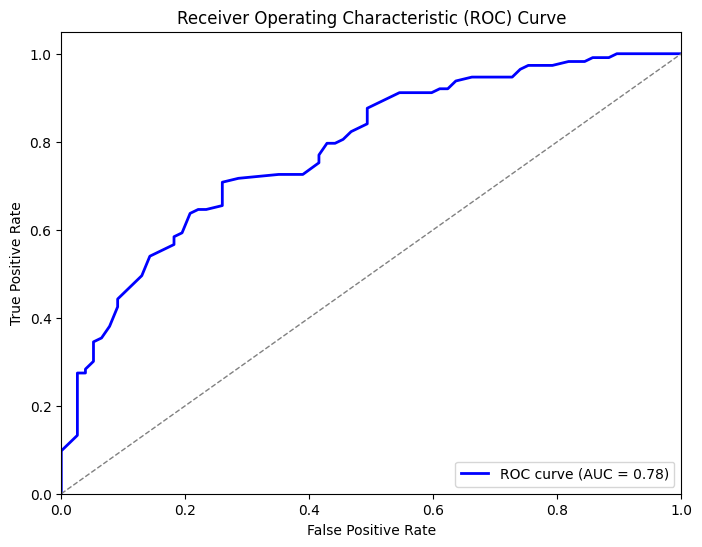

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the probability estimates for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The AUC of 0.78 suggests that the model has capability to discriminate between classes.

#### Final summary including recommendations that the business should undertake



##### ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation